# Calibration


 epi_


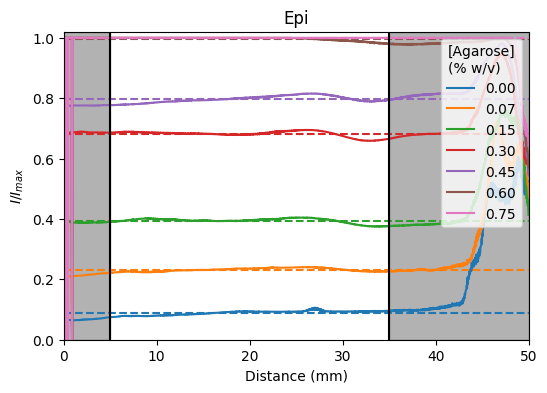

Laplace Approximation
MAP: [1.49468918 0.08562241 1.54372839]
Std: [0.04900721 0.00191096 0.0724154 ]


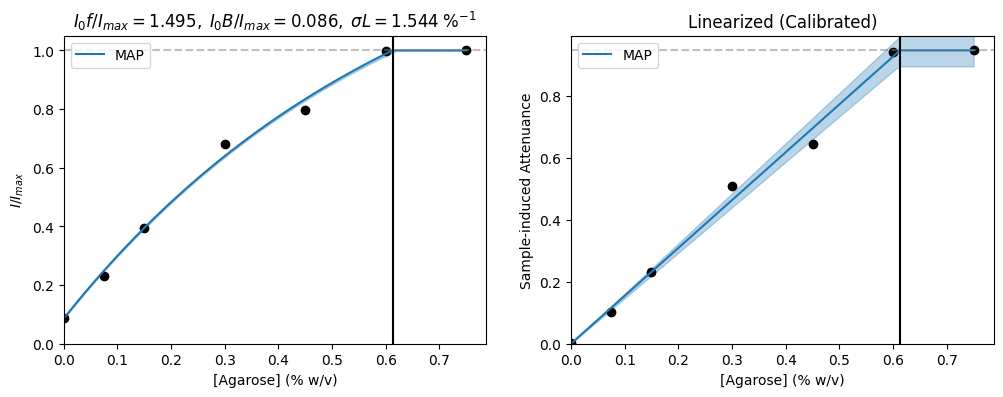

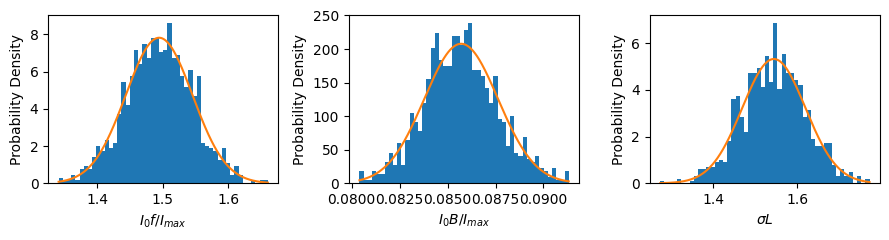

100%|██████████| 10000/10000 [00:11<00:00, 850.58it/s]


MCMC
MAP: [1.50110443 0.08571813 1.5382607 ]
Sample Median: [1.50110443 0.08571813 1.5382607 ]
Sample Std: [0.05079906 0.00190197 0.07290937]


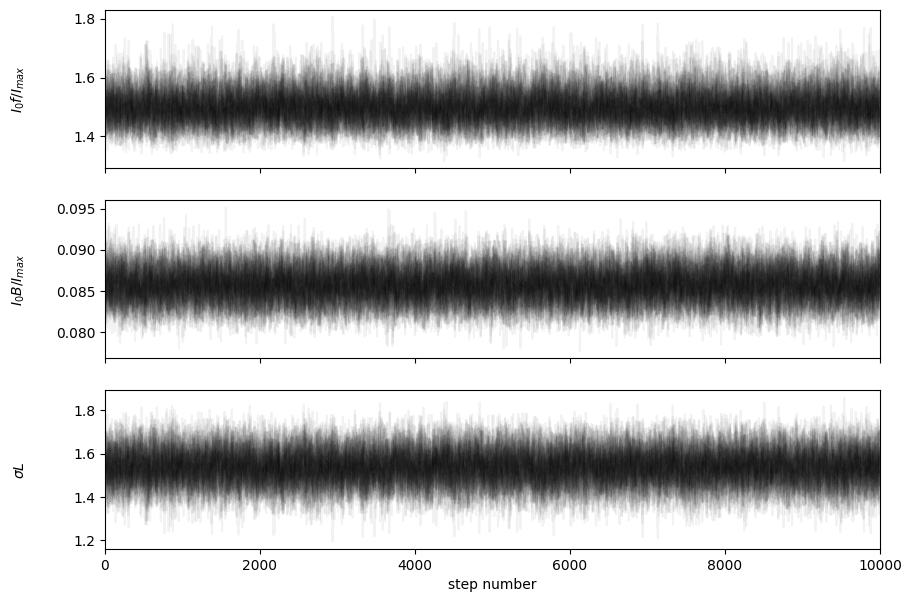

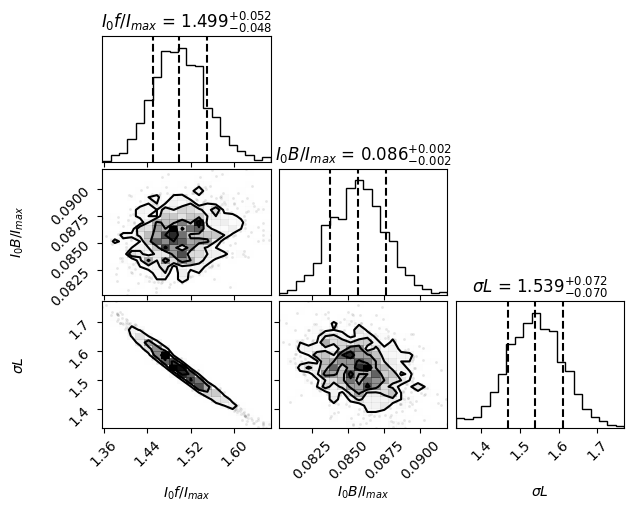

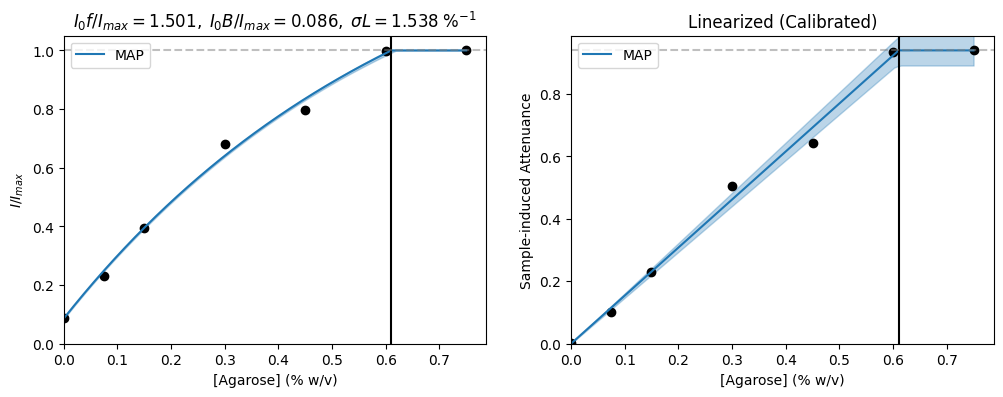

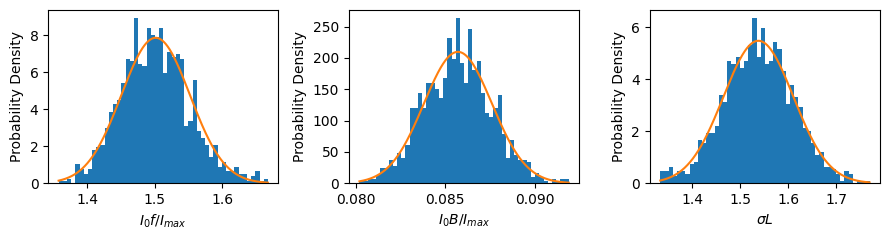

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qcquant
import os

prefixes = [
'epi_',
]
fdirs = [
'../processed/',
]

low = 5.
high = 35.

for fdir,prefix in zip(fdirs,prefixes):
	print('\n',prefix)
	concs,datas = qcquant.calibrate.collect_data(prefix,fdir)
	avgs,fig_prep,ax_prep = qcquant.calibrate.process_data(concs,datas,low,high)
	
	theta,std,fig_cal,ax_cal,fig_samples,ax_samples = qcquant.calibrate.calibrate_laplace(concs,avgs)
	np.save(os.path.join(fdir,'../figures/theta_laplace.npy'),theta)
	for ext in ['png','pdf']:
		fig_cal.savefig(os.path.join(fdir,'../figures/calibration_laplace_calibration.%s'%(ext)))
		fig_samples.savefig(os.path.join(fdir,'../figures/calibration_laplace_samples.%s'%(ext)))
	plt.show()

	theta,std,fig_cal,ax_cal,fig_traj,ax_traj,fig_corner,ax_corner,fig_samples,ax_samples = qcquant.calibrate.calibrate_mcmc(concs,avgs)
	np.save(os.path.join(fdir,'../figures/theta_mcmc.npy'),theta)
	for ext in ['png','pdf']:
		fig_prep.savefig(os.path.join(fdir,'../figures/calibration_preparation.%s'%(ext)))
		fig_cal.savefig(os.path.join(fdir,'../figures/calibration_mcmc_calibration.%s'%(ext)))
		fig_traj.savefig(os.path.join(fdir,'../figures/calibration_mcmc_traj.%s'%(ext)))
		fig_corner.savefig(os.path.join(fdir,'../figures/calibration_mcmc_corner.%s'%(ext)))
		fig_samples.savefig(os.path.join(fdir,'../figures/calibration_mcmc_samples.%s'%(ext)))
	plt.show()

